In [19]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import datetime
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from collections import Counter
plt.rcParams.update({'font.size': 22})
import sys
from matplotlib.ticker import ScalarFormatter
#plt.rcParams.update({'font.size': 22})

In [222]:
#Load and show catalog we're working with

catalog = pd.read_csv('../../data/dets_MAD20_nov18.txt', delim_whitespace=True, names=['No', 'date', 'time', 'lat', 'long', 'dep', 'mag', 'cc', 'mad', 'id'])

catalog = catalog[catalog['mag'] > 0]

catalog.head()

,No,date,time,lat,long,dep,mag,cc,mad,id
0,5,2018/11/01,06:00:54.000,16.95,-100.76,5.7,2.10,0.5778,44.20,2.018103e+13
1,11,2018/11/01,09:52:32.180,17.24,-101.17,46.3,2.26,0.3451,28.37,2.017113e+13
2,11,2018/11/02,06:08:05.520,17.15,-100.76,13.3,3.15,0.7217,60.98,2.018093e+13
3,21,2018/11/02,13:08:56.160,17.19,-100.35,7.0,1.94,0.3450,26.07,2.018081e+13
4,36,2018/11/02,20:31:25.620,17.19,-100.35,7.0,2.01,0.3019,22.82,2.018081e+13


In [223]:
# get date and time variable for plotting time vs cumulative moment


catalog['datentime'] = catalog['date'] + ' ' + catalog['time']
catalog['datentime'] = pd.to_datetime(catalog['datentime'], format='%Y/%m/%d %H:%M:%S.%f')

catalog.head()

,No,date,time,lat,long,dep,mag,cc,mad,id,datentime
0,5,2018/11/01,06:00:54.000,16.95,-100.76,5.7,2.10,0.5778,44.20,2.018103e+13,2018-11-01 06:00:54.000
1,11,2018/11/01,09:52:32.180,17.24,-101.17,46.3,2.26,0.3451,28.37,2.017113e+13,2018-11-01 09:52:32.180
2,11,2018/11/02,06:08:05.520,17.15,-100.76,13.3,3.15,0.7217,60.98,2.018093e+13,2018-11-02 06:08:05.520
3,21,2018/11/02,13:08:56.160,17.19,-100.35,7.0,1.94,0.3450,26.07,2.018081e+13,2018-11-02 13:08:56.160
4,36,2018/11/02,20:31:25.620,17.19,-100.35,7.0,2.01,0.3019,22.82,2.018081e+13,2018-11-02 20:31:25.620


In [232]:
#get variables time and magnitude (Mw)

d = list(catalog['datentime'])
m = list(catalog['mag'])
m = [float(ma) for ma in m]
 


In [233]:
#find larger events 

catlarge = catalog[catalog['mag'] > 4.0]

dl = list(catlarge['datentime'])
ml = list(catlarge['mag'])

mkrsize = [int((float(ma)*100)) for ma in ml]
print(len(dl), len(ml), len(mkrsize))

1 1 1


In [235]:
#turn magnitude (Mw) to Mo
m0 = []
m0l = []
for ma in m:
    m0.append(mo)
    
print(len(d), len(m0))
    

86 86


In [236]:
#create cumulative moment variable
n = len(m0)
cmag = []
mcum = [sum(m0[0:x:1]) for x in range(0, n+1)]
mcum = mcum[1:]

ind = []

for da in d:
    for dal in dl:
        if da == dal:
            ind.append(d.index(da))

print(ind)
mlcum = [mcum[i] for i in ind]

print(len(mcum), len(d), len(dl), len(mlcum))

[5]
86 86 1 1


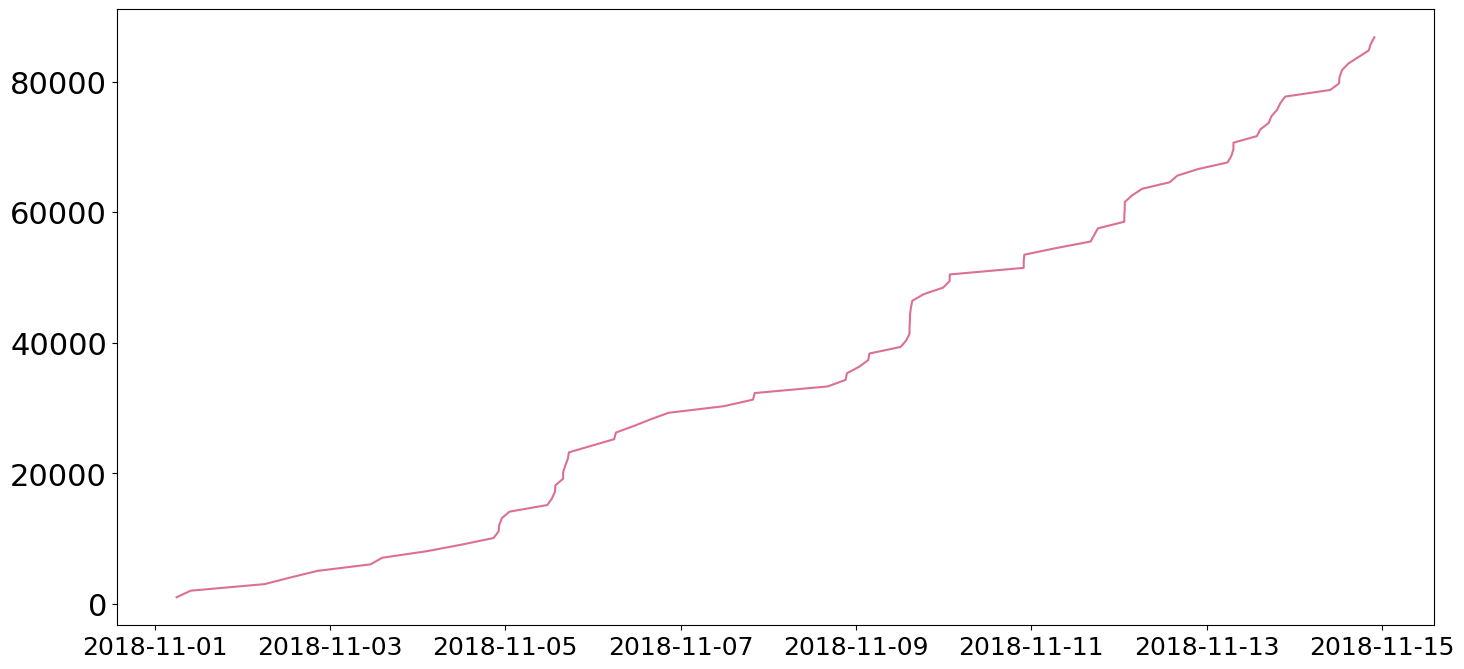

In [237]:
#setup and define plot


fig, ax = plt.subplots(figsize=(17,8))
plt.plot(d, mcum, color='palevioletred')


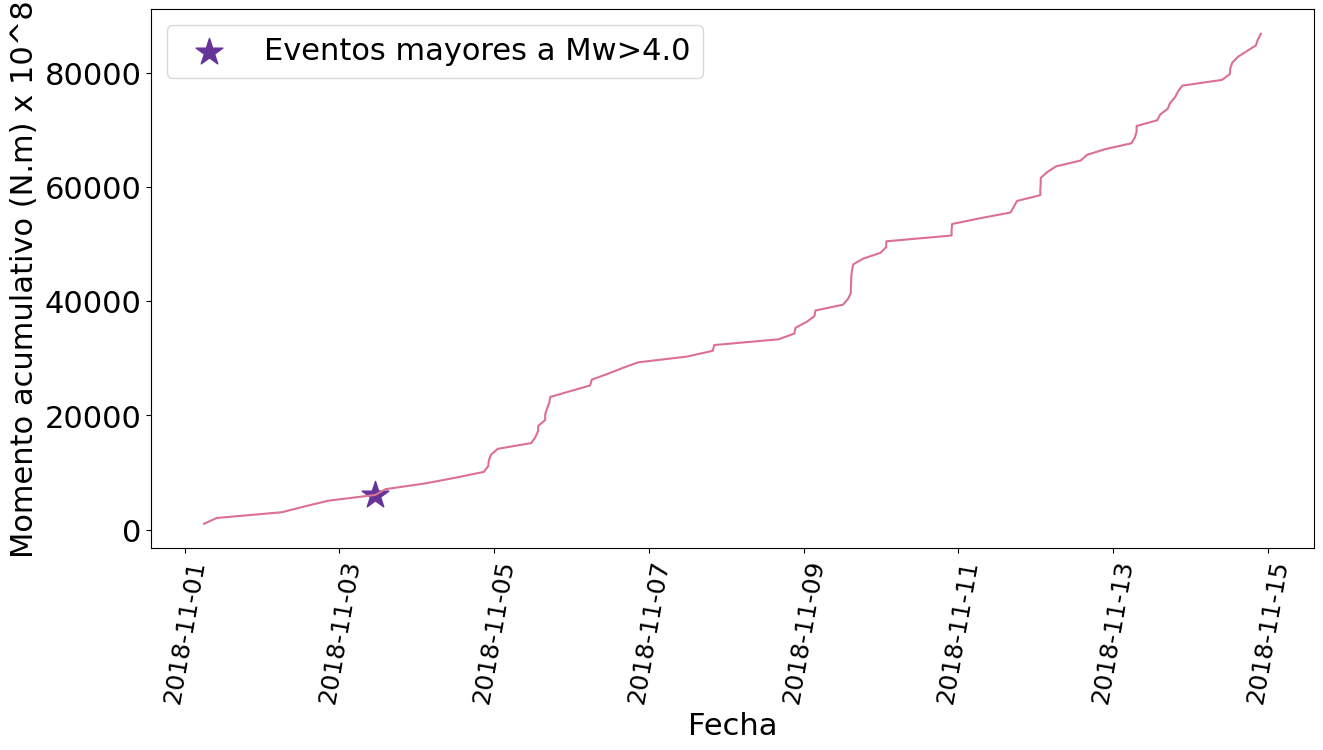

In [238]:
#add large events to plot 

fig, ax1 = plt.subplots(figsize=(15,7))

plt.plot(d, mcum, color='palevioletred')
plt.scatter(dl, mlcum, s=mkrsize, marker='*', color='rebeccapurple', label='Eventos mayores a Mw>4.0')
plt.xlabel('Fecha')
plt.ylabel('Momento acumulativo (N.m) x 10^8')

plt.xticks(rotation=80)
plt.rcParams['xtick.labelsize'] = 18
ax.xaxis.set_major_locator(plt.MaxNLocator(24))


plt.legend()
